# Localization on MLBFR Dataset
This notebook contains object detection or fracture localization task results on the MLBFR Dataset using the current state of the art model, YOLOv8

**Sourced from [Ultralytics](https://github.com/ultralytics/ultralytics)

## Environment Setup

In [1]:
!python --version

Python 3.9.13


In [1]:
!nvidia-smi

Mon Feb 27 02:37:25 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 528.24       Driver Version: 528.24       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:06:00.0  On |                  N/A |
|  0%   50C    P3    41W / 290W |   3154MiB /  8192MiB |     17%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28  Python-3.9.13 torch-1.13.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8192MiB)
Setup complete  (16 CPUs, 31.9 GB RAM, 119.7/931.5 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

## Infer on Test Set

In [3]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt data=dataset_no_aug/test/images/ conf=0.25 source=dataset_no_aug/test/images/ save=true

Ultralytics YOLOv8.0.28  Python-3.9.13 torch-1.13.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8192MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/67 G:\DATASET_RESEARCH\YOLOv8\dataset_no_aug\test\images\IMG0000100_jpg.rf.f217aa26e819f9a7ad40dc19730c2977.jpg: 640x640 12.0ms
image 2/67 G:\DATASET_RESEARCH\YOLOv8\dataset_no_aug\test\images\IMG0000144_jpg.rf.cf4536be95ece52bf4420a9d22c0b1da.jpg: 640x640 2 fractureds, 19.5ms
image 3/67 G:\DATASET_RESEARCH\YOLOv8\dataset_no_aug\test\images\IMG0000156_jpg.rf.fb4e2f2209dd0c84bf0527c9a718e7a1.jpg: 640x640 13.0ms
image 4/67 G:\DATASET_RESEARCH\YOLOv8\dataset_no_aug\test\images\IMG0000750_jpg.rf.ddad57c996513da2cc3e9c0564ff5639.jpg: 640x640 1 fractured, 13.0ms
image 5/67 G:\DATASET_RESEARCH\YOLOv8\dataset_no_aug\test\images\IMG0000844_jpg.rf.66c6a6dcf678f9c2f3df03f25ad36806.jpg: 640x640 1 fractured, 13.0ms
image 6/67 G:\DATASET_RESEARCH\YOLOv8\dataset_no_aug\test\images\IMG0001007_jpg.rf.4d3a8892c907

## Visualize the Prediction

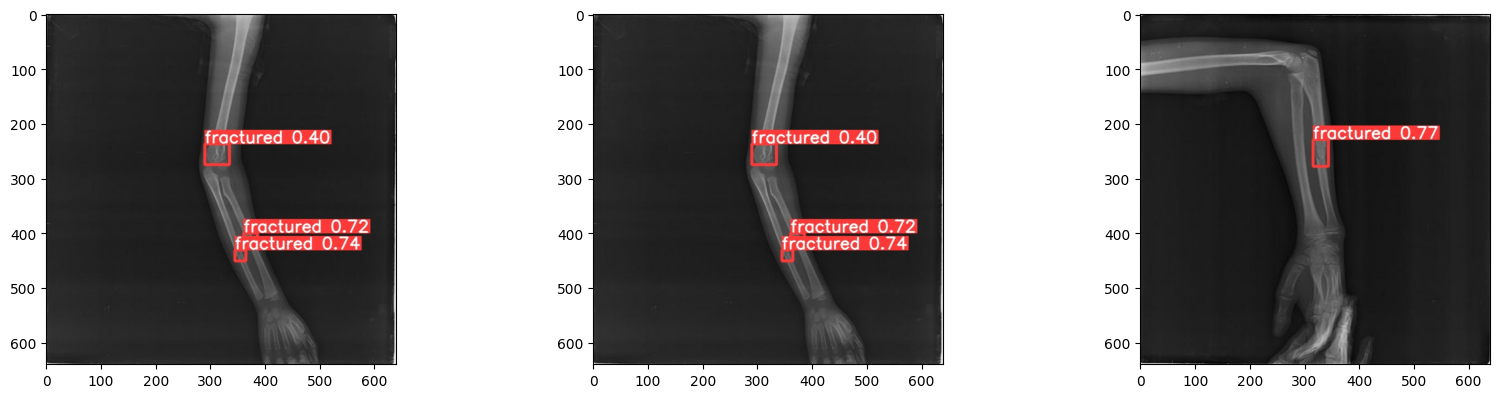

In [4]:
import glob,random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
%matplotlib inline

images = []
total_number_of_image_shown = 3
for i in range(total_number_of_image_shown):
    images.append(Image.open(random.choice(glob.glob("runs/detect/predict2/*.jpg"))))

plt.figure(figsize=(20,10))
columns = 3
for i, image in enumerate(images):
    plt.subplot(int(len(images) / columns + 1), columns, i + 1)
    plt.imshow(image)